# Experiments

To get the best results, we want to setup a stable setting for our experiments, try out several models or several configurations and validate and evaluate those properly.

In [25]:
from ml import liver_pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

When we inspect the liver dataset, we notice that the target variable disease is unbalanced. 28% has a liver disease and 72% has not.

In [26]:
df = liver_pd()

In [33]:
sum(df.Disease)/len(df)

0.2849740932642487

A nice way to balance the dataset is to resample the class that has the minority, so that they are equal in size. However, we should only balance the training set and not the validation set, because otherwise we will nog get a correct estimate on how well we are doing.

In [51]:
df_train, df_valid = train_test_split(df, test_size=0.2)

In [52]:
from sklearn.utils import resample
df0 = df_train[df_train.Disease == 0]
df1 = df_train[df_train.Disease == 1]
len(df0), len(df1)

(323, 140)

In [53]:
df1_upsampled = resample(df1, n_samples=len(df0)) 
df_train_balanced = pd.concat([df0, df1_upsampled])

Then construct our sets for training and validation as usual.

In [54]:
train_y = df_train_balanced.Disease
train_X = df_train_balanced.drop(columns='Disease')
valid_y = df_valid.Disease
valid_X = df_valid.drop(columns='Disease')

In [55]:
model = LogisticRegression()

In [56]:
model.fit(train_X, train_y)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Oops the model did not converge, perhaps scaling the data helps.

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)

In [58]:
model.fit(train_X, train_y)

LogisticRegression()

In [59]:
pred_y = model.predict(valid_X)
accuracy_score(valid_y, pred_y)

0.5862068965517241

This means that 60% of the people with a disease is correctly identified, and only 28% of the people that are predicted to have a liver disease actually have it. The F1 score is the harmonic mean between recall and precision 

In [60]:
recall_score(valid_y, pred_y)

0.6

In [61]:
precision_score(valid_y, pred_y)

0.2830188679245283

In [62]:
f1_score(valid_y, pred_y)

0.3846153846153846

# Hyper parameter tuning

For decision trees we have an additional free parameter, the maximum_depth.

In [63]:
from sklearn.tree import DecisionTreeClassifier

def dt(depth):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_X, train_y)
    pred_y = model.predict(valid_X)
    a = f1_score(valid_y, pred_y)
    return (a, depth)

When we sweep the depth hyperparameter over a range. You will actually find that if you repeat the experiment, de best max-depth is not very stable. But the f1-score is on average  highest for deeper trees and also higher to that of logistic regression.

Note: when a list contains tuples, max() will return the tuple with the highest value for the first value in the tuple, in this case the F1 score.

In [75]:
depths = [ dt(d) for d in range(1, 20) ]
max(depths)

(0.4230769230769231, 17)

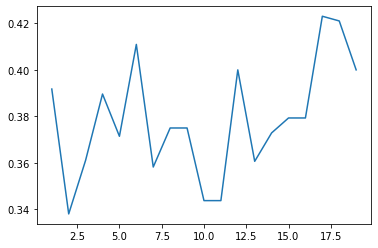

In [76]:
from matplotlib import pyplot as plt
acc, max_depth = zip(*depths)
plt.plot(max_depth, acc)

#### Computing Recall on the training and validation set using SKLearn

In [77]:
model = DecisionTreeClassifier(max_depth=17)
model.fit(train_X, train_y)
pred_y = model.predict(valid_X)
print('recall ', recall_score(valid_y, pred_y))
print('precision ', precision_score(valid_y, pred_y))

recall  0.4
precision  0.35714285714285715
